In [33]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2022-10-12 17:54:11--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.196.138, 74.125.196.139, 74.125.196.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h9duggnn98om26lc33h1bs3b24mt5c5o/1665597225000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=ae08ba7a-c87a-435e-aa0c-bb18fe082f02 [following]
--2022-10-12 17:54:15--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h9duggnn98om26lc33h1bs3b24mt5c5o/1665597225000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=ae08ba7a-c87a-435e-aa0c-bb18fe082f02
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-0

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/2022數據合作競賽/label_origin_IQR.csv')
data

Unnamed: 0      idx      id       order_date  product  sales_price  \
0                0        0   41180   2021/7/9 17:32    14095           85   
1                1        1  447222   2021/7/6 23:46    18108           89   
2                2        2   27284   2021/2/1 15:06    15743           64   
3                3        3  400110  2021/1/12 20:40    23231           75   
4                4        4  396355   2021/7/5 00:03    22272           75   
...            ...      ...     ...              ...      ...          ...   
885745      930530  1030325  486622  2021/5/20 08:03    19606           60   
885746      930531  1030326  350379   2021/7/7 16:57    14982           96   
885747      930532  1030327  288832  2021/6/11 08:27     6133          159   
885748      930533  1030328  295550  2021/8/27 08:13     2047           72   
885749      930534  1030329   50823  2021/7/26 16:16     5038           79   

        quantity  department  store  city  district  customer  sex  age_group  \
0              3          13     16     2        54     49986  NaN        1.0   
1              1          24     22     1        55     49606  NaN        1.0   
2              1          24     38     8         9    131535  NaN        1.0   
3              1           2      0     5        34     85161  NaN        8.0   
4              2           5      0     5        34    111291  NaN        8.0   
...          ...         ...    ...   ...       ...       ...  ...        ...   
885745         1          24     97     4         0     84132  NaN        1.0   
885746         1          18     97     4         0     84132  NaN        1.0   
885747         1          26     97     4         0     51318  NaN        1.0   
885748         1          24     97     4         0     84132  NaN        1.0   
885749         1          24     97     4         0     84132  NaN        1.0   

        Revenue order_date_notime  
0           255        2021-07-09  
1            89        2021-07-06  
2            64        2021-02-01  
3            75        2021-01-12  
4           150        2021-07-05  
...         ...               ...  
885745       60        2021-05-20  
885746       96        2021-07-07  
885747      159        2021-06-11  
885748       72        2021-08-27  
885749       79        2021-07-26  

[885750 rows x 16 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885750 entries, 0 to 885749
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         885750 non-null  int64  
 1   idx                885750 non-null  int64  
 2   id                 885750 non-null  int64  
 3   order_date         885750 non-null  object 
 4   product            885750 non-null  int64  
 5   sales_price        885750 non-null  int64  
 6   quantity           885750 non-null  int64  
 7   department         885750 non-null  int64  
 8   store              885750 non-null  int64  
 9   city               885750 non-null  int64  
 10  district           885750 non-null  int64  
 11  customer           885750 non-null  int64  
 12  sex                110134 non-null  object 
 13  age_group          885750 non-null  float64
 14  Revenue            885750 non-null  int64  
 15  order_date_notime  885750 non-null  object 
dtypes:

In [5]:
customer_ = data.groupby(['customer'])['product'].apply(lambda x: ' '.join([str(m) for m in x])).reset_index()
customer_

customer                                            product
0              0                                   20156 6430 12624
1              1                                              19851
2              2  7144 16854 4803 275 22103 15602 21049 2320 163...
3              3  8971 8971 17001 11330 212 18802 20641 17584 16...
4              4                              12337 9569 6874 14156
...          ...                                                ...
153274    153274  7630 17594 9732 1713 10593 2434 5923 23082 230...
153275    153275                             11188 6051 19033 21724
153276    153276  21013 21041 1160 3079 17001 6290 14939 8607 14...
153277    153277                       22723 7284 22749 10061 16371
153278    153278  20078 22867 1338 16284 14932 10705 8354 3312 1...

[153279 rows x 2 columns]

In [6]:
train_data = data[data['order_date']<="2021-08-31"]
train_data

Unnamed: 0      idx      id       order_date  product  sales_price  \
6                6        6  371766  2020/8/27 10:17     5810            0   
7                7        7  244621  2020/11/5 17:45     3109           42   
14              14       14  573225  2020/9/17 11:19     5464            0   
22              22       23  244621  2020/11/5 17:45    14660           42   
27              27       28  573225  2020/9/17 11:19      568           36   
...            ...      ...     ...              ...      ...          ...   
885728      930513  1030308   56255   2020/5/5 20:43     9170           39   
885733      930518  1030313  332347  2020/8/17 15:15     7337           68   
885735      930520  1030315   24532  2020/5/30 17:20    12318           45   
885741      930526  1030321  284147  2020/6/15 10:48    21044           59   
885744      930529  1030324  226148  2020/5/17 08:42    15379          119   

        quantity  department  store  city  district  customer  sex  age_group  \
6              1          26     15     8         9     20956  NaN        1.0   
7              2           2      0     5        34     71519    A        0.0   
14             1           5     90     0        47     62406  NaN        8.0   
22             1          24      0     5        34     71519    A        0.0   
27             1           5     90     0        47     62406  NaN        8.0   
...          ...         ...    ...   ...       ...       ...  ...        ...   
885728         1           5     97     4         0    122970  NaN        1.0   
885733         2          18     97     4         0     75199  NaN       11.0   
885735         1           5     97     4         0    122970  NaN        1.0   
885741         1          24     97     4         0     84132  NaN        1.0   
885744         1          24     97     4         0     75199  NaN       11.0   

        Revenue order_date_notime  
6             0        2020-08-27  
7            84        2020-11-05  
14            0        2020-09-17  
22           42        2020-11-05  
27           36        2020-09-17  
...         ...               ...  
885728       39        2020-05-05  
885733      136        2020-08-17  
885735       45        2020-05-30  
885741       59        2020-06-15  
885744      119        2020-05-17  

[288138 rows x 16 columns]

In [7]:
test_data = data[data['order_date']>"2021-08-31"]
test_data

Unnamed: 0      idx      id       order_date  product  sales_price  \
0                0        0   41180   2021/7/9 17:32    14095           85   
1                1        1  447222   2021/7/6 23:46    18108           89   
2                2        2   27284   2021/2/1 15:06    15743           64   
3                3        3  400110  2021/1/12 20:40    23231           75   
4                4        4  396355   2021/7/5 00:03    22272           75   
...            ...      ...     ...              ...      ...          ...   
885745      930530  1030325  486622  2021/5/20 08:03    19606           60   
885746      930531  1030326  350379   2021/7/7 16:57    14982           96   
885747      930532  1030327  288832  2021/6/11 08:27     6133          159   
885748      930533  1030328  295550  2021/8/27 08:13     2047           72   
885749      930534  1030329   50823  2021/7/26 16:16     5038           79   

        quantity  department  store  city  district  customer  sex  age_group  \
0              3          13     16     2        54     49986  NaN        1.0   
1              1          24     22     1        55     49606  NaN        1.0   
2              1          24     38     8         9    131535  NaN        1.0   
3              1           2      0     5        34     85161  NaN        8.0   
4              2           5      0     5        34    111291  NaN        8.0   
...          ...         ...    ...   ...       ...       ...  ...        ...   
885745         1          24     97     4         0     84132  NaN        1.0   
885746         1          18     97     4         0     84132  NaN        1.0   
885747         1          26     97     4         0     51318  NaN        1.0   
885748         1          24     97     4         0     84132  NaN        1.0   
885749         1          24     97     4         0     84132  NaN        1.0   

        Revenue order_date_notime  
0           255        2021-07-09  
1            89        2021-07-06  
2            64        2021-02-01  
3            75        2021-01-12  
4           150        2021-07-05  
...         ...               ...  
885745       60        2021-05-20  
885746       96        2021-07-07  
885747      159        2021-06-11  
885748       72        2021-08-27  
885749       79        2021-07-26  

[597612 rows x 16 columns]

In [8]:
# 購買各產品的會員
df_product = train_data.groupby(['product'])['customer'].apply(lambda x: ' '.join([str(m) for m in x])).reset_index()
df_product.head()

product                                           customer
0        0  116627 69416 101421 29888 62436 135918 95490 3...
1        1                   141899 119160 71953 12996 125038
2        2                                  51669 81388 35664
3        5  9706 130497 113911 150471 46804 118786 134630 ...
4        6                          28140 133962 52669 139926

In [9]:
# 會員2020/4/29-2021/8/31內所購買的所有東西
df_group = train_data.groupby(['customer'])['product'].apply(lambda x: ' '.join([str(m) for m in x])).reset_index()
df_group.head()

customer                                            product
0         1                                              19851
1         2                  15602 21049 4342 2109 11330 11330
2         5                                        15981 10004
3        11  12467 16086 8750 8750 1439 13536 773 20626 109...
4        12                                         7630 12714

In [10]:
df_group.to_csv('/content/drive/MyDrive/data/itemlens_uid_itemids.csv', index=False)

# Use Pyspark train item2vec

In [11]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [12]:
! pip install pyspark
! pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 47 kB/s 
     |████████████████████████████████| 199 kB 51.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=bab8b07cbed86cdbba813ddcfb30020388ff6dc084425fc7581abfe68d95c35d
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
#初始化spark
import findspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PySpark Item2vec").getOrCreate()

sc = spark.sparkContext

In [14]:
df = spark.read.csv('/content/drive/MyDrive/data/itemlens_uid_itemids.csv', header=True)
df.show(5)

+--------+--------------------+
|customer|             product|
+--------+--------------------+
|       1|               19851|
|       2|15602 21049 4342 ...|
|       5|         15981 10004|
|      11|12467 16086 8750 ...|
|      12|          7630 12714|
+--------+--------------------+
only showing top 5 rows



In [15]:
from pyspark.sql import functions as F
from pyspark.sql import types as T

#把字符串格是變成list
df = df.withColumn('product', F.split(df.product, " "))

In [16]:
df.show()

+--------+--------------------+
|customer|             product|
+--------+--------------------+
|       1|             [19851]|
|       2|[15602, 21049, 43...|
|       5|      [15981, 10004]|
|      11|[12467, 16086, 87...|
|      12|       [7630, 12714]|
|      17|[18146, 18833, 21...|
|      19|[7630, 16342, 19293]|
|      21|[6220, 5858, 1933...|
|      26|              [2611]|
|      27|[80, 17709, 8753,...|
|      29|[11715, 19948, 89...|
|      32|[14703, 12692, 18...|
|      35|[5048, 13891, 181...|
|      36|      [17933, 21243]|
|      38|[18146, 21469, 58...|
|      39|[11372, 12630, 22...|
|      40|              [8570]|
|      46|              [4866]|
|      48|[19060, 11379, 21...|
|      49|      [21364, 20204]|
+--------+--------------------+
only showing top 20 rows



In [17]:
from pyspark.ml.feature import Word2Vec

word2Vec = Word2Vec(vectorSize=5, minCount=0, inputCol="product", outputCol="Stock_2vec")

model = word2Vec.fit(df)

In [18]:
# 不計算每個user的embedding，而是計算item的embedding
model.getVectors().show(3, truncate=False)

+-----+----------------------------------------------------------------------------------------------------------+
|word |vector                                                                                                    |
+-----+----------------------------------------------------------------------------------------------------------+
|19125|[-0.05391545221209526,-0.07303516566753387,0.059160925447940826,-0.20221297442913055,-0.02539098635315895]|
|5451 |[-0.03495445474982262,-0.14714021980762482,0.03468566760420799,-0.02245926856994629,0.1286419779062271]   |
|17319|[0.048993125557899475,0.0464320033788681,0.1006920337677002,-0.04703381657600403,0.05457817018032074]     |
+-----+----------------------------------------------------------------------------------------------------------+
only showing top 3 rows



In [19]:
model.getVectors().select("word", "vector").toPandas().to_csv('/content/drive/MyDrive/data/stocklens_stock_embeddind.csv', index=True)

In [20]:
model.getVectors().show(truncate=False)

+-----+--------------------------------------------------------------------------------------------------------------+
|word |vector                                                                                                        |
+-----+--------------------------------------------------------------------------------------------------------------+
|19125|[-0.05391545221209526,-0.07303516566753387,0.059160925447940826,-0.20221297442913055,-0.02539098635315895]    |
|5451 |[-0.03495445474982262,-0.14714021980762482,0.03468566760420799,-0.02245926856994629,0.1286419779062271]       |
|17319|[0.048993125557899475,0.0464320033788681,0.1006920337677002,-0.04703381657600403,0.05457817018032074]         |
|20778|[-1.5636009629815817E-4,-0.07992050051689148,-0.03233281895518303,-0.012737667188048363,-8.264572825282812E-4]|
|17079|[-0.09845180809497833,-0.07288265973329544,0.0887315571308136,-0.029081454500555992,0.10363353043794632]      |
|13172|[-0.15835319459438324,-0.4262036383152008

In [21]:
df_embedding = pd.read_csv("/content/drive/MyDrive/data/stocklens_stock_embeddind.csv")
df_embedding.head(3)

Unnamed: 0   word                                             vector
0           0  19125  [-0.05391545221209526,-0.07303516566753387,0.0...
1           1   5451  [-0.03495445474982262,-0.14714021980762482,0.0...
2           2  17319  [0.048993125557899475,0.0464320033788681,0.100...

In [22]:
df_merge = pd.merge(left=df_embedding, 
                    right=df_product,
                    left_on="word",
                    right_on="product")
df_merge.head()

Unnamed: 0   word                                             vector  \
0           0  19125  [-0.05391545221209526,-0.07303516566753387,0.0...   
1           1   5451  [-0.03495445474982262,-0.14714021980762482,0.0...   
2           2  17319  [0.048993125557899475,0.0464320033788681,0.100...   
3           3  20778  [-0.00015636009629815817,-0.07992050051689148,...   
4           4  17079  [-0.09845180809497833,-0.07288265973329544,0.0...   

   product                                           customer  
0    19125  137921 65015 73693 128716 5853 72688 128972 97...  
1     5451  41527 20000 23888 121508 10442 38259 44684 557...  
2    17319                       67330 9672 76501 17312 88592  
3    20778                          127812 133113 93981 86138  
4    17079                                  36813 33855 17427

In [23]:
import numpy as np
import json
df_merge["vector"] = df_merge["vector"].map(lambda x : np.array(json.loads(x)))
 
# 随便挑選一個商品
product = 19125
df_merge.loc[df_merge["product"] == product]

Unnamed: 0   word                                             vector  \
0           0  19125  [-0.05391545221209526, -0.07303516566753387, 0...   

   product                                           customer  
0    19125  137921 65015 73693 128716 5853 72688 128972 97...

In [24]:
product_embedding = df_merge.loc[df_merge["product"]==product, "vector"].iloc[0]
product_embedding

array([-0.05391545, -0.07303517,  0.05916093, -0.20221297, -0.02539099])

In [25]:
# 余弦相似度
from scipy.spatial import distance
df_merge["sim_value"] = df_merge["vector"].map(lambda x : 1 - distance.cosine(product_embedding, x))
# 按相似度降序排列，查询前10条
df_merge.sort_values(by="sim_value", ascending=False)[["product", "customer", "sim_value"]].head(10)


product                                           customer  sim_value
0        19125  137921 65015 73693 128716 5853 72688 128972 97...   1.000000
15552    15690         102097 44930 102500 9709 88143 63237 28691   0.996688
6552     14971                    106397 143495 23336 1182 128191   0.996603
2312       674  50542 152366 39960 52339 119590 31102 73947 28...   0.993308
10341    21500  80147 8320 146145 24882 94354 93588 36606 9093...   0.989076
16133     2046  51828 70179 50064 78164 143172 32708 2201 2201...   0.985286
2706     15894  5359 49497 45395 112188 148693 141397 6385 970...   0.984904
3896     17973  23440 11208 65680 73028 36564 29971 29971 7258...   0.983908
8500      4527  5394 123593 118926 85409 142927 40959 96918 14...   0.983342
10062      208  145960 79717 74391 30979 38392 51630 87729 151...   0.982909

In [26]:
customer_

customer                                            product
0              0                                   20156 6430 12624
1              1                                              19851
2              2  7144 16854 4803 275 22103 15602 21049 2320 163...
3              3  8971 8971 17001 11330 212 18802 20641 17584 16...
4              4                              12337 9569 6874 14156
...          ...                                                ...
153274    153274  7630 17594 9732 1713 10593 2434 5923 23082 230...
153275    153275                             11188 6051 19033 21724
153276    153276  21013 21041 1160 3079 17001 6290 14939 8607 14...
153277    153277                       22723 7284 22749 10061 16371
153278    153278  20078 22867 1338 16284 14932 10705 8354 3312 1...

[153279 rows x 2 columns]

In [ ]:
customer_['precision'] = precision
customer_['recall'] = recall
customer_['f1_score'] = 0

for i in range(len(customer_)):
  if(customer_['precision'][i]!=0 and customer_['recall'][i]!=0):
    customer_['f1_score'][i] = 2 * precision * recall / (precision + recall)

In [ ]:
def sim_value(product):
  df_merge.loc[df_merge["product"] == product]
  product_embedding = df_merge.loc[df_merge["product"]==product, "vector"].iloc[0]
  df_merge["sim_value"] = df_merge["vector"].map(lambda x : 1 - distance.cosine(product_embedding, x))
  # 按相似度降序排列，查询前10条
  recom_ten = df_merge.sort_values(by="sim_value", ascending=False)[["product", "customer", "sim_value"]].head(10)
  rec_product = []
  for i in range(10):
    rec_product.append(recom_ten['product'].iloc[i])
  return rec_product

In [ ]:
all_repeat = []
precision = []
recall = []
for n in range(len(customer_['customer'])):
  #過去(訓練)購買資料
  customer_pass = train_data[train_data['customer']==customer_['customer'].iloc[n]]
  #現在(測試)購買資料
  customer_example = test_data[test_data['customer']==customer_['customer'].iloc[n]]
  if (len(customer_pass)!=0 and len(customer_example)!=0):
    customer_pass_product = []
    for i in range(len(customer_pass['product'])):
      customer_pass_product.append(customer_pass['product'].iloc[i])
    example_product = []
    for i in range(len(customer_example['product'])):
      example_product.append(customer_example['product'].iloc[i])

    repeat = []
    for i in range(len(customer_pass_product)):
      rec_product = sim_value(customer_pass_product[i])
      for j in range(len(example_product)):
        if example_product[j] in rec_product:
          print(example_product[j])
          repeat.append(example_product[j])
        else:
          print("no")
    all_repeat.append(repeat)
    precision.append(len(repeat)/10)
    recall.append(len(repeat)/len(example_product))
  else:
    all_repeat.append(0)
    precision.append(0)
    recall.append(0)

Streaming output truncated to the last 5000 lines.
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
4519
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
4519
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
3000
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
5618
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
16135
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no

## 個別顧客計算

In [ ]:
#過去指定顧客購買產品紀錄 #143137
customer_pass = train_data[train_data['customer']==152782 ]
customer_pass

Unnamed: 0     idx      id        order_date  product  sales_price  \
124603      169388  186237  307892   2020/9/23 09:28    19105           65   
125398      170183  187110  151987  2020/10/25 08:53     2984           65   
125978      170763  187746  587184   2020/5/31 21:54    23191          111   
127070      171855  188966  278097  2020/12/17 17:23    14715           43   
127813      172598  189794  394551  2020/11/14 23:38    12944           72   
128511      173296  190556  392344   2020/5/21 09:52    14983           99   
129445      174230  191598  151987  2020/10/25 08:53    10797           39   
129678      174463  191861   20724  2020/11/25 09:07     2434          114   
130274      175059  192524  171873   2020/7/12 11:33     7596           49   
130458      175243  192725  307892   2020/9/23 09:28     2198           34   
130882      175667  193206  278097  2020/12/17 17:23     1698           99   

        quantity  department  store  city  district  customer  sex  age_group  \
124603         1          24     14    15         4    152782  NaN        3.0   
125398         1          21     14    15         4    152782  NaN        3.0   
125978         1          24     14    15         4    152782  NaN        3.0   
127070         1          24     14    15         4    152782  NaN        3.0   
127813         2          24     14    15         4    152782  NaN        3.0   
128511         1          24     14    15         4    152782  NaN        3.0   
129445         1          21     14    15         4    152782  NaN        3.0   
129678         1          24     14    15         4    152782  NaN        3.0   
130274         1          24     14    15         4    152782  NaN        3.0   
130458         1          24     14    15         4    152782  NaN        3.0   
130882         1          24     14    15         4    152782  NaN        3.0   

        Revenue order_date_notime  
124603       65        2020-09-23  
125398       65        2020-10-25  
125978      111        2020-05-31  
127070       43        2020-12-17  
127813      144        2020-11-14  
128511       99        2020-05-21  
129445       39        2020-10-25  
129678      114        2020-11-25  
130274       49        2020-07-12  
130458       34        2020-09-23  
130882       99        2020-12-17

In [ ]:
#143137  
customer_example = test_data[test_data['customer']==152782]
customer_example

Unnamed: 0     idx      id       order_date  product  sales_price  \
88079       132864  146920  162899  2021/6/12 21:57    18915          319   
88909       133694  147800  162899  2021/6/12 21:57     7354          107   
123900      168685  185476  424590  2021/4/27 11:20     2213           75   
123932      168717  185509  511108  2021/1/19 12:26     2242           36   
125520      170305  187240  310758   2021/1/8 09:44    14074           79   
126101      170886  187880  229192  2021/2/23 17:36    16558          139   
126947      171732  188825   80709  2021/4/12 13:32    15784           49   
127839      172624  189822    4117  2021/8/16 14:31     8177          135   
129928      174713  192137    4117  2021/8/16 14:31     9898           69   
130161      174946  192403   94163  2021/1/29 12:22     5068           95   
130162      174947  192404  424590  2021/4/27 11:20    12163            0   
131078      175863  193427  424590  2021/4/27 11:20    12574           19   

        quantity  department  store  city  district  customer  sex  age_group  \
88079          1          24     77     6         3    152782  NaN        3.0   
88909          1           4     77     6         3    152782  NaN        3.0   
123900         1          24     14    15         4    152782  NaN        3.0   
123932         1          24     14    15         4    152782  NaN        3.0   
125520         1           5     14    15         4    152782  NaN        3.0   
126101         1           5     14    15         4    152782  NaN        3.0   
126947         1          24     14    15         4    152782  NaN        3.0   
127839         1          24     14    15         4    152782  NaN        3.0   
129928         1          24     14    15         4    152782  NaN        3.0   
130161         1          24     14    15         4    152782  NaN        3.0   
130162         1          24     14    15         4    152782  NaN        3.0   
131078         1          24     14    15         4    152782  NaN        3.0   

        Revenue order_date_notime  
88079       319        2021-06-12  
88909       107        2021-06-12  
123900       75        2021-04-27  
123932       36        2021-01-19  
125520       79        2021-01-08  
126101      139        2021-02-23  
126947       49        2021-04-12  
127839      135        2021-08-16  
129928       69        2021-08-16  
130161       95        2021-01-29  
130162        0        2021-04-27  
131078       19        2021-04-27

In [ ]:
customer_pass_product = []
for i in range(len(customer_pass['product'])):
  customer_pass_product.append(customer_pass['product'].iloc[i])

In [ ]:
customer_pass_product

[19105, 2984, 23191, 14715, 12944, 14983, 10797, 2434, 7596, 2198, 1698]

In [ ]:
example_product = []
for i in range(len(customer_example['product'])):
  example_product.append(customer_example['product'].iloc[i])

In [ ]:
example_product

[18915, 7354, 2213, 2242, 14074, 16558, 15784, 8177, 9898, 5068, 12163, 12574]

In [ ]:
# 針對特定每個顧客過去購買的商品做比對
def sim_value(product):
  df_merge.loc[df_merge["product"] == product]
  product_embedding = df_merge.loc[df_merge["product"]==product, "vector"].iloc[0]
  df_merge["sim_value"] = df_merge["vector"].map(lambda x : 1 - distance.cosine(product_embedding, x))
  # 按相似度降序排列，查询前10条
  recom_ten = df_merge.sort_values(by="sim_value", ascending=False)[["product", "customer", "sim_value"]].head(10)
  rec_product = []
  for i in range(10):
    rec_product.append(recom_ten['product'].iloc[i])
  return rec_product

In [ ]:
repeat = []
for i in range(len(customer_pass_product)):
  rec_product = sim_value(customer_pass_product[i])
  for j in range(len(example_product)):
    if example_product[j] in rec_product:
      print(example_product[j])
      repeat.append(example_product[j])
    else:
      print("no")

no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
2213
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no


In [ ]:
repeat

[2213]

In [ ]:
#152782
precision = 1/10
recall = 1/len(customer_example)
F1_score = 2 * precision * recall / (precision + recall)
print(precision)
print(recall)
print(F1_score)

0.1
0.08333333333333333
0.0909090909090909


In [ ]:
# 随便挑選一個商品
product = 2984
df_merge.loc[df_merge["product"] == product]

Unnamed: 0  word                                             vector  \
15745       15745  2984  [0.23702958226203918, -0.24814826250076294, 0....   

       product                                           customer  sim_value  
15745     2984  90453 123001 19181 77466 94430 113306 95176 15...  -0.383708

In [ ]:
product_embedding = df_merge.loc[df_merge["product"]==product, "vector"].iloc[0]
product_embedding

array([ 0.23702958, -0.24814826,  0.44667917, -0.05277211,  0.29024833])

In [ ]:
df_merge["sim_value"] = df_merge["vector"].map(lambda x : 1 - distance.cosine(product_embedding, x))
# 按相似度降序排列，查询前10条
recom_ten = df_merge.sort_values(by="sim_value", ascending=False)[["product", "customer", "sim_value"]].head(10)
recom_ten

product                                           customer  sim_value
15745     2984  90453 123001 19181 77466 94430 113306 95176 15...   1.000000
4297     21605  54691 97578 19189 51547 143675 126522 67814 13...   0.996799
12609    12692  83415 93167 86328 13039 64517 24096 30979 1464...   0.995513
11735     4865  149531 104786 77805 96679 115470 122267 131360...   0.995255
5313     23087  85078 125563 14608 68420 80090 104595 127419 1...   0.995031
15148     2084  21547 21547 31805 64281 131025 131025 55719 55...   0.994963
1682      6571  44502 117767 87923 146426 13990 93422 120005 7...   0.993812
6481      9399  71312 42430 105907 50546 82276 35845 43412 119...   0.993801
7187      9108  128966 5394 112908 24046 61608 76744 8079 7001...   0.993683
3516       966  20956 25218 120441 148409 77479 35448 11019 10...   0.993059

# t-SNE

In [27]:
word = model.getVectors().select("word")
word = np.array(word.select('word').collect())
#轉成一維
word = word.reshape(-1)

item_v = model.getVectors().select("vector")
item_v = np.array(item_v.select('vector').collect())

In [28]:
word.shape

(17110,)

In [29]:
item_v.shape

(17110, 1, 5)

In [ ]:
item_v

array([[[ 0.01304374, -0.04561432, -0.04015445, -0.03961834,
         -0.05386908]],

       [[-0.08083504, -0.06956972,  0.17416959, -0.09969608,
         -0.08959244]],

       [[-0.2599504 ,  0.17522825,  0.07123706,  0.34566644,
          0.31394508]],

       ...,

       [[-0.10870169, -0.08651738,  0.42131525, -0.26330802,
         -0.01289214]],

       [[ 0.02281167,  0.09458306, -0.05727564, -0.02211853,
         -0.06479628]],

       [[ 0.0151591 , -0.05295889,  0.31462437, -0.1525799 ,
          0.02909173]]])

In [30]:
item_v=item_v.reshape(17110,5)

In [31]:
from sklearn import manifold
#t-SNE
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(item_v)

#data Visualization 
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min) #normalize

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17110 samples in 0.021s...
[t-SNE] Computed neighbors for 17110 samples in 2.113s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17110
[t-SNE] Computed conditional probabilities for sample 2000 / 17110
[t-SNE] Computed conditional probabilities for sample 3000 / 17110
[t-SNE] Computed conditional probabilities for sample 4000 / 17110
[t-SNE] Computed conditional probabilities for sample 5000 / 17110
[t-SNE] Computed conditional probabilities for sample 6000 / 17110
[t-SNE] Computed conditional probabilities for sample 7000 / 17110
[t-SNE] Computed conditional probabilities for sample 8000 / 17110
[t-SNE] Computed conditional probabilities for sample 9000 / 17110
[t-SNE] Computed conditional probabilities for sample 10000 / 17110
[t-SNE] Computed conditional probabilities for sample 11000 / 17110
[t-SNE] Computed conditional probabilities for sample 12000 / 17110
[t-SNE] Computed conditional probabilities for sam

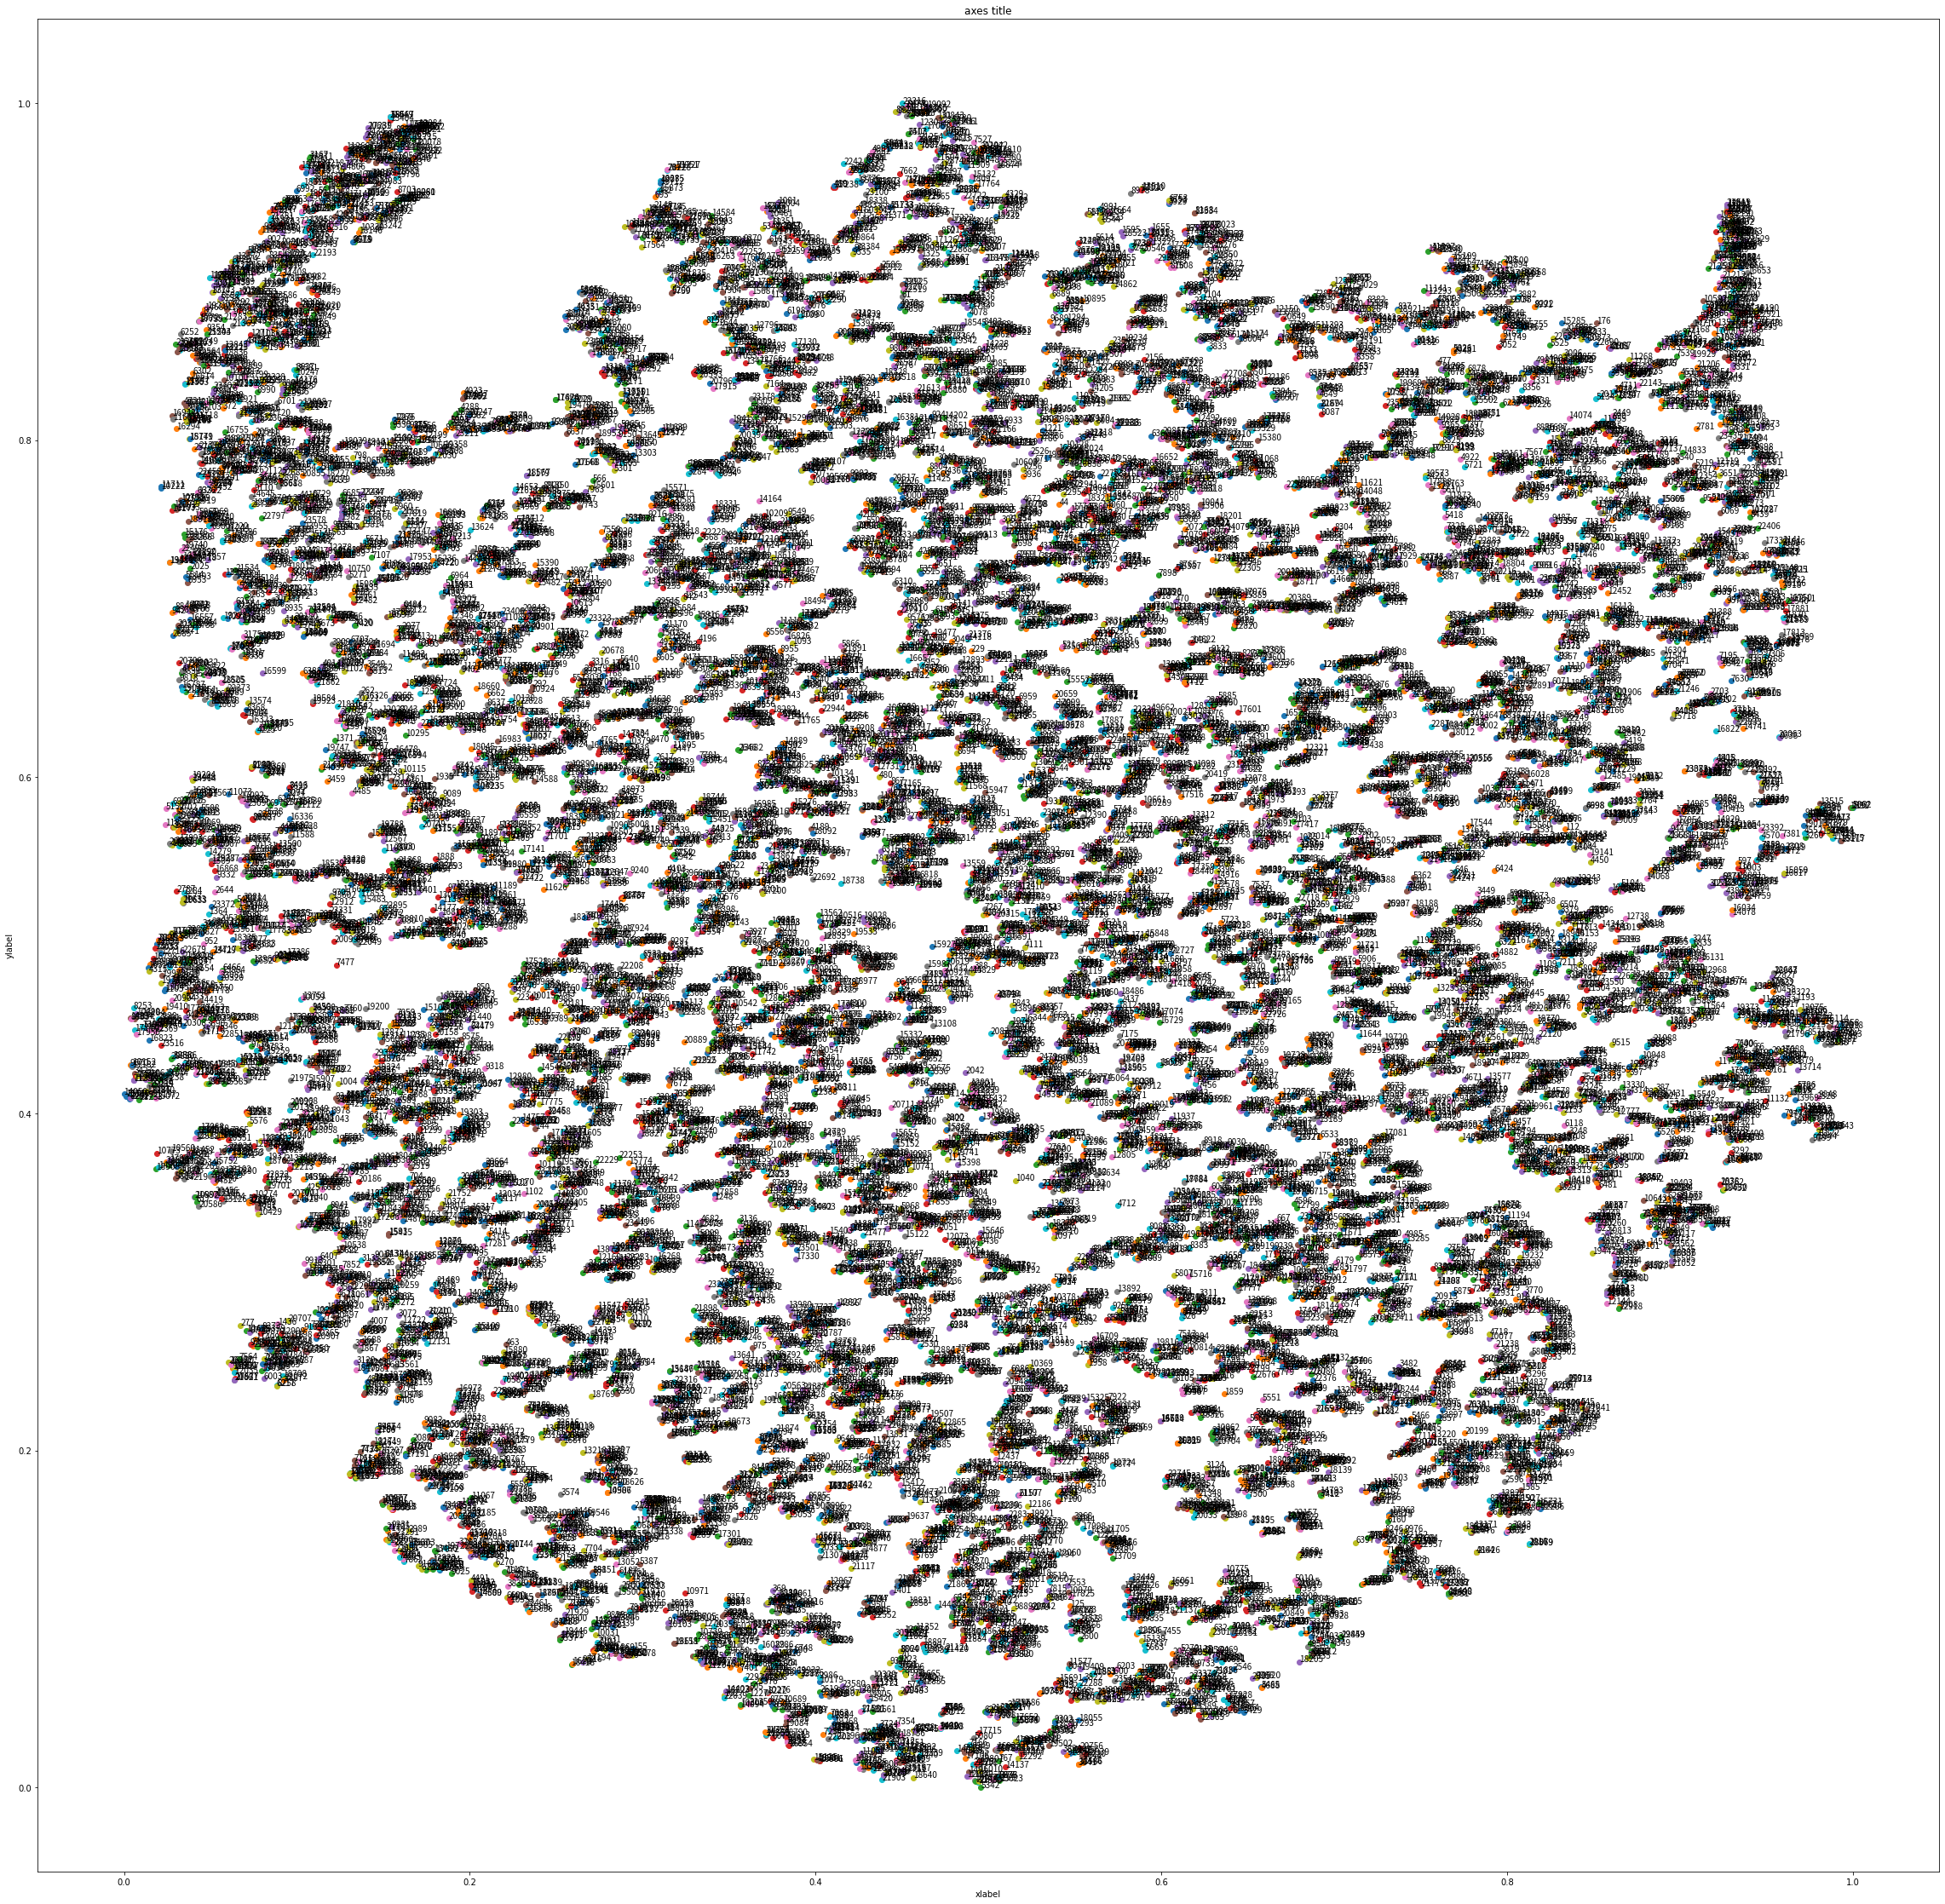

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot()
for i in range(X_norm.shape[0]):
  ax.scatter(X_norm[i,0], X_norm[i,1])
  ax.annotate(word[i], (X_norm[i,0], X_norm[i,1]), fontproperties=myfont)

ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

plt.show()